In [1]:
# ============================================
# 1. Configuración del entorno en Google Colab
# ============================================

# Comprobar GPU
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales (si aún no están instaladas)
!pip install seaborn plotly -q

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


# 02 – Visualización de Datos

En el notebook 2 transformaré datos en conocimiento a través de visualizaciones. Primero utilizo el poder de Matplotlib para crear una base de gráficos clara y concisa, y me apoyo en Seaborn para explorar las relaciones y tendencias estadísticas más profundas que residen en los conjuntos de datos. Finalmente, incluyo un gráfico interactivo con Plotly. Los datos que se utiliza son los clásicos en este campo: el dataset de Titanic, que me permite analizar los factores de supervivencia a partir de variables categóricas clave, y el dataset de Iris, ideal para explorar y entender las complejas relaciones entre sus variables numéricas.

In [2]:
# ============================================
# 2. Carga de datasets de ejemplo
# ============================================

# Datasets integrados de Seaborn
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

print("Titanic shape:", titanic.shape)
print("Iris shape:", iris.shape)

titanic.head()


Titanic shape: (891, 15)
Iris shape: (150, 5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Carga de datos

Para mis ejercicios de visualización, utilizo dos datasets clásicos y muy didácticos que vienen integrados con Seaborn: el de Titanic, perfecto para ver cómo variables como la clase, la edad y el sexo influyeron en la supervivencia, y el de Iris, que nos da las medidas exactas de pétalos y sépalos de distintas especies de flores.

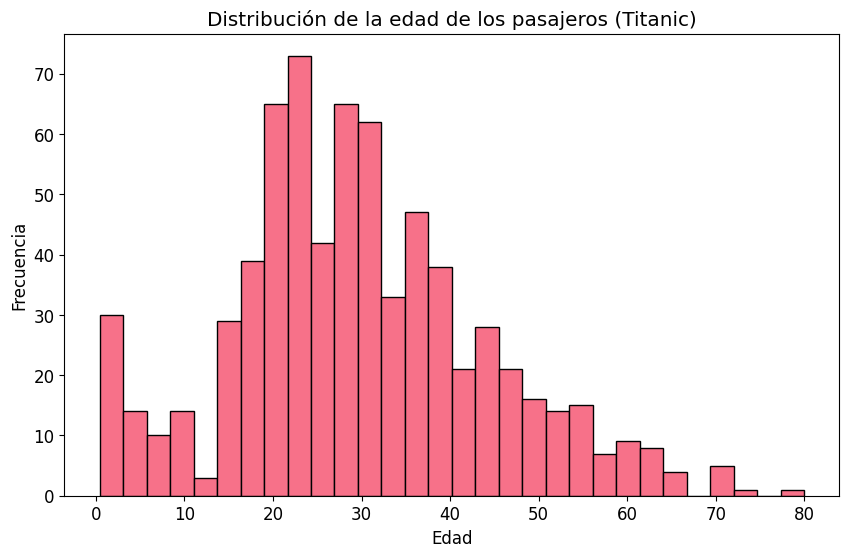

In [3]:
# ============================================
# 3.1 Histogramas con Matplotlib
# ============================================

plt.figure()
plt.hist(titanic['age'].dropna(), bins=30, edgecolor='black')
plt.title('Distribución de la edad de los pasajeros (Titanic)')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


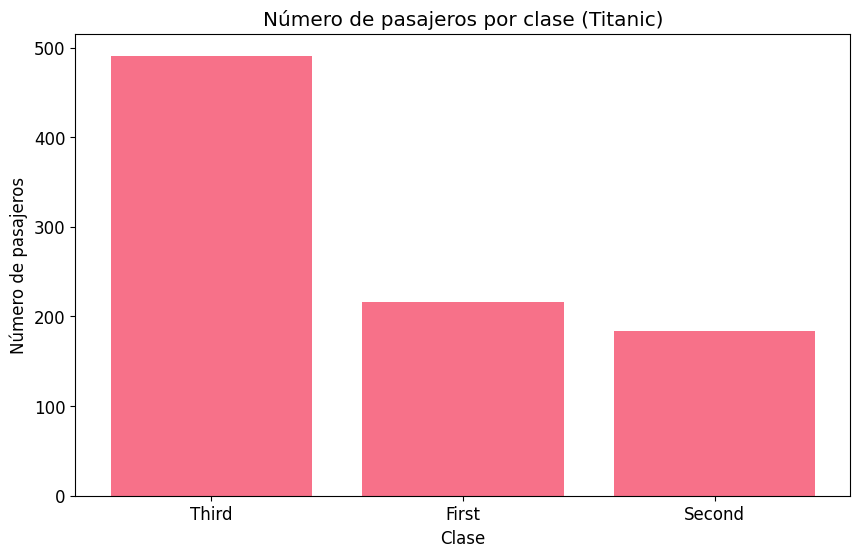

In [4]:
# 3.2 Gráfico de barras: conteo de pasajeros por clase

class_counts = titanic['class'].value_counts()

plt.figure()
plt.bar(class_counts.index, class_counts.values)
plt.title('Número de pasajeros por clase (Titanic)')
plt.xlabel('Clase')
plt.ylabel('Número de pasajeros')
plt.show()


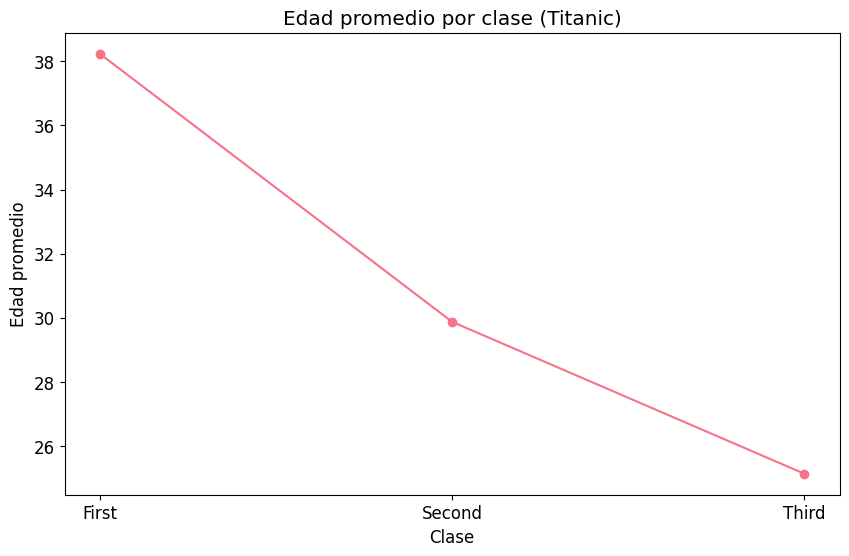

In [5]:
# 3.3 Gráfico de líneas: ejemplo simple con el promedio de edad por clase

mean_age_by_class = titanic.groupby('class')['age'].mean()

plt.figure()
plt.plot(mean_age_by_class.index, mean_age_by_class.values, marker='o')
plt.title('Edad promedio por clase (Titanic)')
plt.xlabel('Clase')
plt.ylabel('Edad promedio')
plt.show()


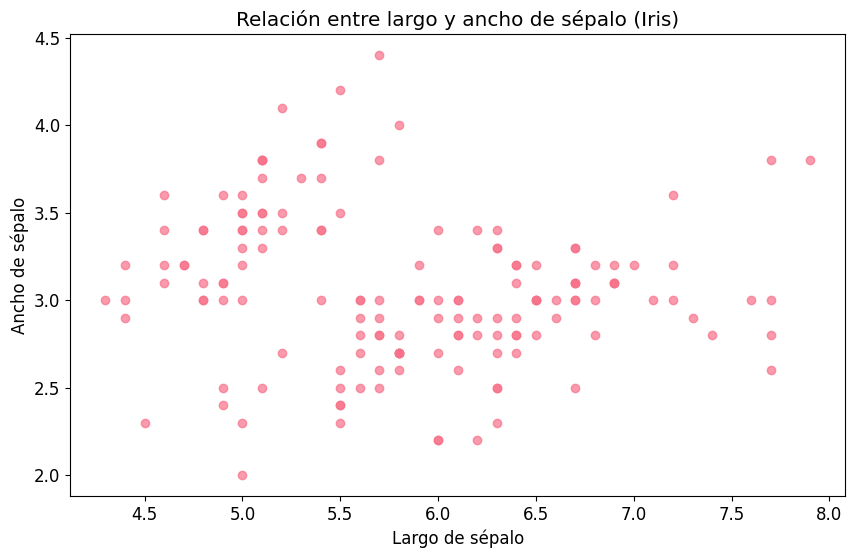

In [6]:
# 3.4 Diagrama de dispersión: largo vs ancho de sépalo (Iris)

plt.figure()
plt.scatter(iris['sepal_length'], iris['sepal_width'], alpha=0.7)
plt.title('Relación entre largo y ancho de sépalo (Iris)')
plt.xlabel('Largo de sépalo')
plt.ylabel('Ancho de sépalo')
plt.show()


## 3. Visualización con Matplotlib

Usando la librería Matplotlib, exploré a fondo los datos: visualicé rápidamente la distribución de edad de los pasajeros del Titanic mediante un histograma, comparé el número total de pasajeros por clase con un gráfico de barras, y analicé cómo variaba la edad promedio entre esas clases con un gráfico de líneas. Además, con el dataset de Iris, usé un gráfico de dispersión para ver la relación entre el largo y ancho del sépalo. Aunque su sintaxis es más detallada, Matplotlib me proporcionó el control fino que necesito para personalizar cada aspecto de estas visualizaciones.

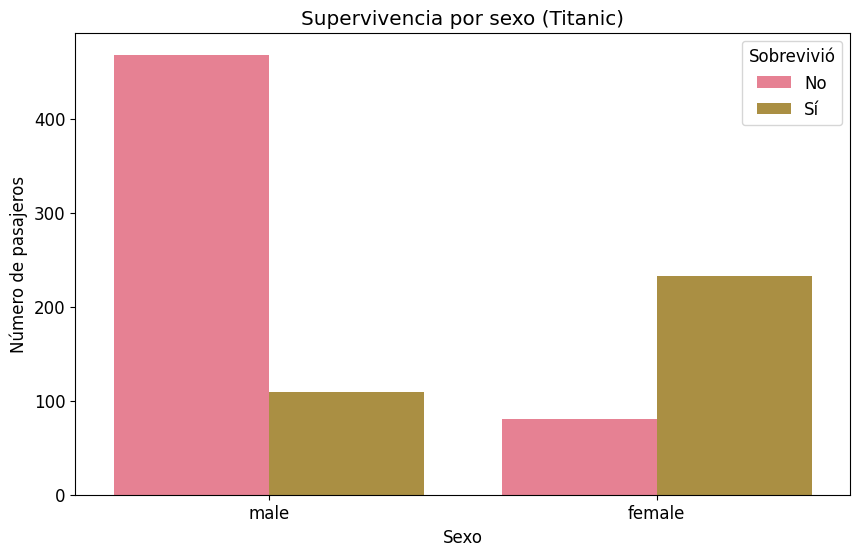

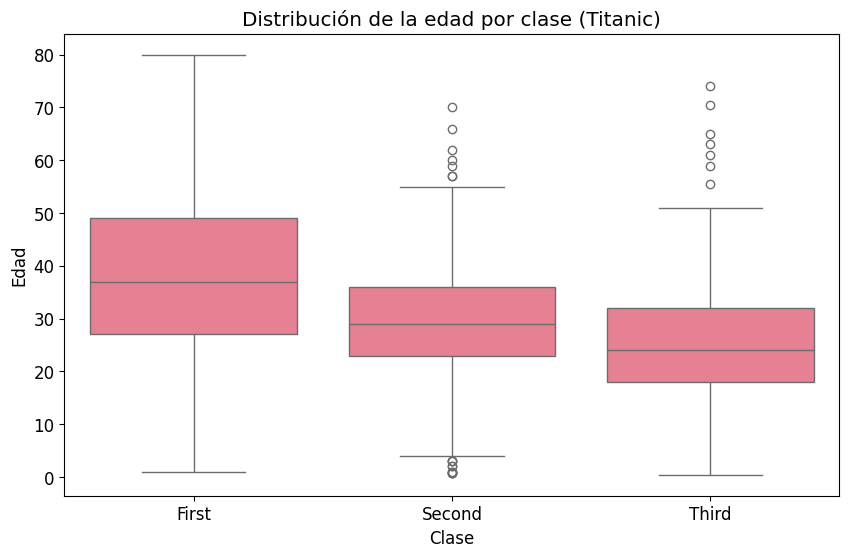

In [7]:
# ============================================
# 4. Visualizaciones estadísticas con Seaborn
# ============================================

# 4.1 Conteo de supervivencia por sexo
plt.figure()
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Supervivencia por sexo (Titanic)')
plt.xlabel('Sexo')
plt.ylabel('Número de pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()

# 4.2 Boxplot: distribución de edades por clase
plt.figure()
sns.boxplot(data=titanic, x='class', y='age')
plt.title('Distribución de la edad por clase (Titanic)')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()


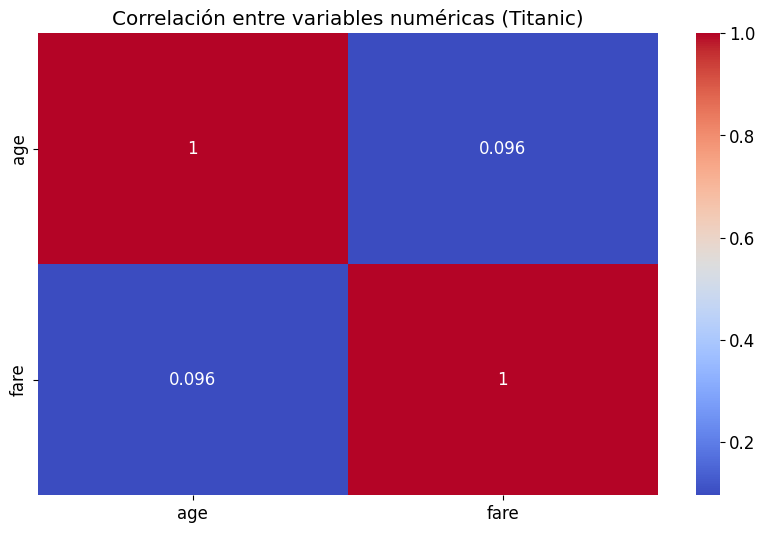

In [8]:
# 4.3 Mapa de calor de correlaciones numéricas (Titanic)

titanic_numeric = titanic[['age', 'fare']].copy()
titanic_numeric = titanic_numeric.dropna()

corr = titanic_numeric.corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas (Titanic)')
plt.show()


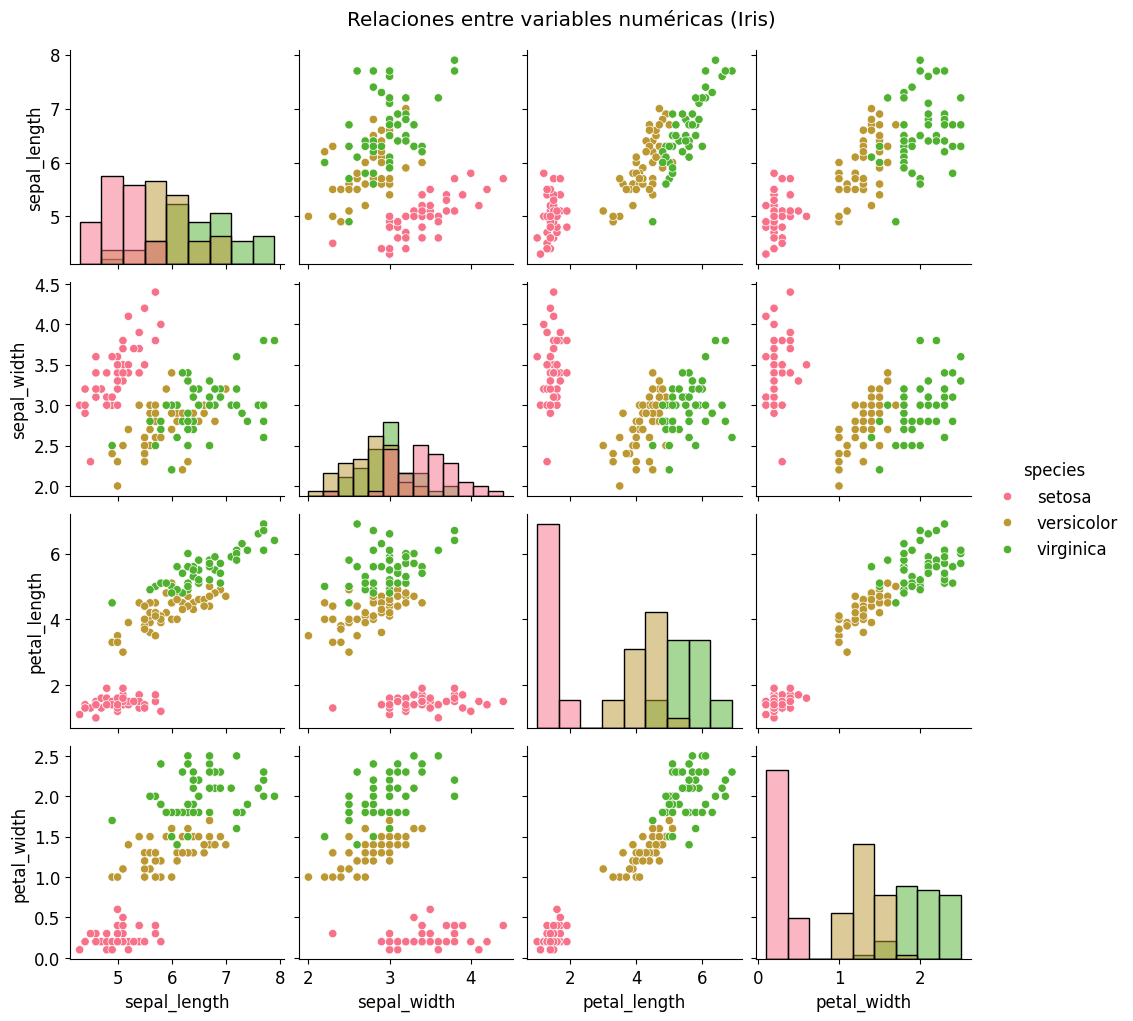

In [9]:
# 4.4 Pairplot del dataset de Iris

sns.pairplot(iris, hue='species', diag_kind='hist')
plt.suptitle('Relaciones entre variables numéricas (Iris)', y=1.02)
plt.show()


## 4. Visualizaciones estadísticas con Seaborn

Gracias a Seaborn, pude generar visualizaciones más estadísticas y de alto nivel con mucho menos código. Realicé análisis clave como un countplot para comparar la supervivencia por sexo, un boxplot para ver la distribución de edad por clase, y un heatmap para identificar las correlaciones entre las variables numéricas. Además, utilicé un pairplot en el dataset de Iris para explorar la relación de múltiples variables a la vez. Su gran ventaja es que simplifica la sintaxis y está optimizado para trabajar directamente con los DataFrames de Pandas.

In [10]:
# ============================================
# 5. Bonus: Visualización interactiva con Plotly
# ============================================

fig = px.scatter(
    iris,
    x='sepal_length',
    y='sepal_width',
    color='species',
    title='Gráfico interactivo - Sépalo (Iris)',
    hover_data=['petal_length', 'petal_width']
)

fig.show()


## 5. Gráfico interactivo con Plotly (bonus)

Como toque final, incorporé un gráfico de dispersión interactivo usando Plotly Express, que transforma la exploración de datos en una experiencia dinámica, permitiendo a cualquier usuario pasar el cursor y ver detalles específicos de cada punto, e incluso filtrar especies al hacer clic en la leyenda, haciéndolo ideal para presentaciones que buscan la participación activa de la audiencia.

## 6. Conclusiones

En el desarrollo del notebook 2, pude ver el kit de herramientas de visualización. Empecé por la base, usando Matplotlib para construir gráficos esenciales que me ayudaron a entender la distribución y estructura interna de mis datos.

Luego, escalé la complejidad con Seaborn, una librería que me permitió generar análisis estadísticos más profundos y gráficos elaborados con una sintaxis mucho más limpia y eficiente, optimizada para la exploración de DataFrames.

Finalmente, con Plotly, di un salto hacia las visualizaciones interactivas.
Haciéndola crucial, ya que me permite comunicar resultados de manera dinámica y atractiva, haciendo que los datos no solo sean visibles, sino también explorables para cualquier audiencia.

In [11]:
# ============================================
# 7. Guardar el notebook 2 en GitHub desde Colab
# ============================================

from google.colab import auth
auth.authenticate_user()

!git config --global user.email "liz.castillo@uees.edu.ec"
!git config --global user.name "Liz Eliana Castillo Zamora"

# Clonar el repositorio de la materia (si no está ya clonado en /content)
import os

if not os.path.exists("/content/UEES-IA-Semana1-CastilloLiz"):
    !git clone https://github.com/lizcastillo-glitch/UEES-IA-Semana1-CastilloLiz.git


Cloning into 'UEES-IA-Semana1-CastilloLiz'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 24 (delta 5), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 61.30 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [12]:
import os
import shutil
import subprocess

def save_to_github(notebook_name, commit_message="Actualizar notebook"):
    """
    Guarda el notebook en la carpeta /Notebooks del repo UEES-IA-Semana1-CastilloLiz
    y hace commit + push a GitHub.
    """
    repo_path = "/content/UEES-IA-Semana1-CastilloLiz"
    notebook_src = f"/content/{notebook_name}"
    notebook_dest = f"{repo_path}/Notebooks/{notebook_name}"

    # Copiar el archivo al repositorio
    shutil.copy(notebook_src, notebook_dest)

    # Hacer commit y push
    os.chdir(repo_path)
    subprocess.run(["git", "add", f"Notebooks/{notebook_name}"])
    subprocess.run(["git", "commit", "-m", commit_message])
    subprocess.run(["git", "push", "origin", "main"])

    print(f"✅ Notebook {notebook_name} guardado correctamente en GitHub.")


In [13]:
# Usar al final de cada sesión de trabajo
save_to_github(
    "02_Visualizacion_Datos.ipynb",
    "Visualización de datos con Matplotlib, Seaborn y Plotly"
)


FileNotFoundError: [Errno 2] No such file or directory: '/content/02_Visualizacion_Datos.ipynb'

In [14]:
!ls /content


sample_data  UEES-IA-Semana1-CastilloLiz


In [15]:
!find /content -name "*.ipynb"


/content/UEES-IA-Semana1-CastilloLiz/Notebooks/01_Fundamentos_NumPy_Pandas.ipynb
